In [25]:
from bunkatech.topic_modeling import topic_modeling
from bunkatech.nested_topic_modeling import NestedTopicModeling
from bunkatech.semantics.vocabulary_extension import sbert_extension
import pandas as pd
import bamboolib

# df = pd.read_csv("sample_test.csv")

df = pd.read_excel(
    "/Users/charlesdedampierre/Desktop/SciencePo Projects/shaping-ai/labeling/SHAI-LABELS-ROUND-1.xlsx"
)

df = df.reset_index(drop=True)
df["bindex"] = df.index

folding = ["bien", "opportunité", "innovation", "amélioration", "promesses"]
folding = ["critique de l'intelligence artificielle"]

In [26]:
res = sbert_extension(
    folding,
    df,
    text_var="title_lead",
    sample_terms=1000,
    language="fr",
    top_n=15,
    bert_model="/Volumes/OutFriend/sbert_model/distiluse-base-multilingual-cased-v1",
)

Extract Terms: 100%|█████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.91it/s]


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

In [17]:
bunka = NestedTopicModeling()
model = bunka.fit(
    df,
    text_var="title_lead",
    index_var="bindex",
    sample_size=1000,
    sample_terms=500,
    embeddings_model="tfidf",
    folding=None,
    ngrams=(2, 2),
    ents=False,
    language="fr",
    db_path=".",
)

Embeddings..
Reducing the vectors..
UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=10, verbose=True)
Sat Mar 12 14:58:30 2022 Construct fuzzy simplicial set
Sat Mar 12 14:58:30 2022 Finding Nearest Neighbors
Sat Mar 12 14:58:32 2022 Finished Nearest Neighbor Search
Sat Mar 12 14:58:34 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Mar 12 14:58:36 2022 Finished embedding


Extract Terms: 100%|███████████████████████████████████████████████| 500/500 [00:10<00:00, 48.59it/s]


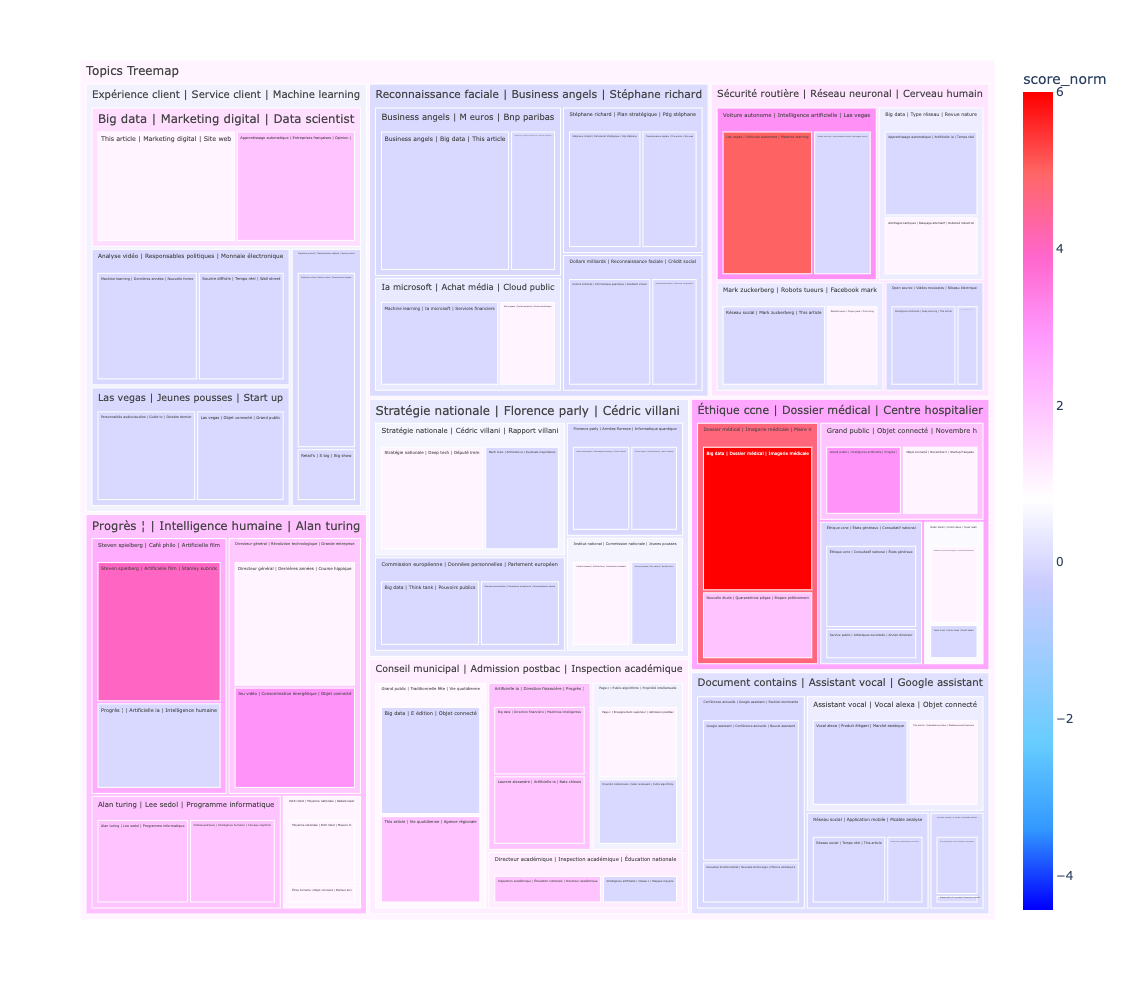

In [24]:
map = bunka.make_nested_maps(
    size_rule="topic_documents",
    map_type="treemap",
    query=extended_folding,
)
map.show()

In [ ]:


data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)
